# Classes utiles
J'ai décidé de créer des classes afin de faciliter l'utilisation des courbes.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __rmul__(self, r):
        return Point(self.x * r, self.y * r)

    def __add__(self, point):
        return Point(self.x + point.x, self.y + point.y)

    def __radd__(self, r):
        return Point(self.x + r, self.y + r)

    def __repr__(self):
        return "Point [" + str(self.x) + ", " + str(self.y) + "]"

    def __div__(self, other):
        return Point(self.x / other, self.y / other)


class Polygone:
    def __init__(self, points):
        self.points = points

    def __getitem__(self, item):
        return self.points[item]

    def __len__(self):
        return len(self.points)

    def plot(self):
        xs = []
        ys = []
        for point in self.points:
            xs.append(point.x)
            ys.append(point.y)
        plt.plot(xs, ys, ".r")
        plt.plot(xs, ys, "-c")


class BSpline:
    def __init__(self, polygone: Polygone, nodal: list, k: int):
        self.k = k
        self.m = k - 1
        self.n = len(polygone) - 1
        self.polygone = polygone
        self.nodal = nodal

    def p(self, u):
        nodal = self.nodal
        k = self.k
        n = self.n
        polygone = self.polygone

        if u < nodal[k - 1] or u > nodal[n + 1]:
            return 0

        j = k
        dec = 0
        while u > nodal[j]:
            j += 1
            dec += 1

        Pcalc = []
        for i in range(k):
            Pcalc.append(polygone[dec + i])
        # print(u)
        # print(Pcalc)
        for j in range(k - 1):
            for i in range(k - j - 1):
                umin = nodal[dec + 1 + i + j]
                umax = nodal[dec + k + i]
                Pcalc[i] = (umax - u) / (umax - umin) * Pcalc[i] + (u - umin) / (umax - umin) * Pcalc[i + 1]
        return Pcalc[0]

    def plot(self, pas):
        xs = []
        ys = []
        for u in np.arange(self.nodal[self.k - 1], self.nodal[self.n + 1], pas):
            #print(u)
            res = self.p(u)
            xs.append(res.x)
            ys.append(res.y)

        plt.plot(xs, ys, "-m")

# Courbe simple
Implémentation de la courbe de B-Spline sur un polygone simple Pour vérifier que tout fonctionne.

[0, 1, 2, 3, 4, 5]


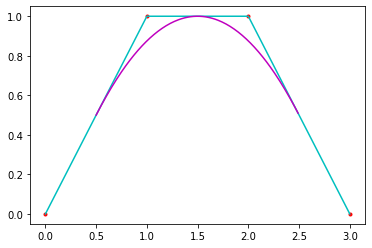

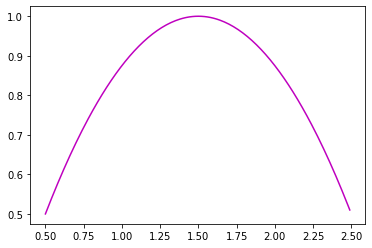

In [4]:
points = [
    Point(0, 0),
    Point(1, 1),
    Point(2, 1),
    Point(3, 0),
]
k = 3
nodal = [_ for _ in range(len(points) + k - 1)]
print(nodal)

pol = Polygone(points)
bez = BSpline(pol, nodal, k)

plt.figure()
pol.plot()
bez.plot(0.01)
plt.show()

plt.figure()
bez.plot(0.01)
plt.show()

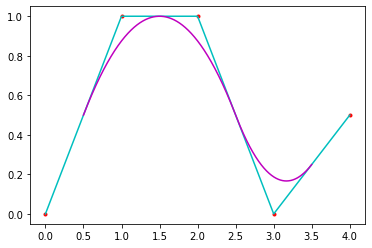

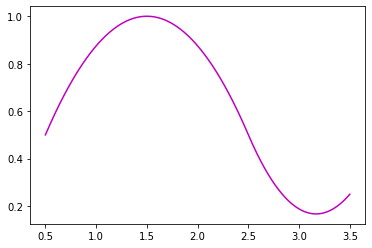

In [5]:
points1 = [
    Point(0, 0),
    Point(1, 1),
    Point(2, 1),
    Point(3, 0),
    Point(4, 0.5),
]
k = 3
nodal = [_ for _ in range(len(points1) + k - 1)]

pol1 = Polygone(points1)
spine1 = BSpline(pol1, nodal, k)

plt.figure()
pol1.plot()
spine1.plot(0.001)
plt.show()

plt.figure()
spine1.plot(0.001)
plt.show()

# Tracé complexe
Polygone avec au moins 13 points de contrôle.

## Tracé avec B-Spline classique (k = 3 et vecteur nodal uniforme)

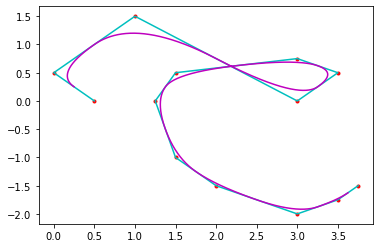

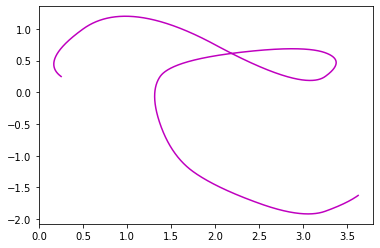

In [6]:
points2 = [
    Point(0.5, 0),
    Point(0, 0.5),
    Point(1, 1.5),
    Point(3, 0),
    Point(3.5, 0.5),
    Point(3, 0.75),
    Point(1.5, 0.5),
    Point(1.25, 0),
    Point(1.5, -1),
    Point(2, -1.5),
    Point(3, -2),
    Point(3.5, -1.75),
    Point(3.75, -1.5),
]
k = 3
nodal = [_ for _ in range(len(points2) + k - 1)]

pol2 = Polygone(points2)
spine2 = BSpline(pol2, nodal, k)

plt.figure()
pol2.plot()
spine2.plot(0.001)
plt.show()

plt.figure()
spine2.plot(0.001)
plt.show()

## Tests avec différent ordres et vecteurs nodaux
On observe que le vecteur nodal uniforme ouvert permet de commencer sur le premier point du polygone et termine sur l'avant dernier.

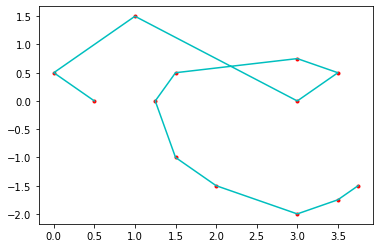

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


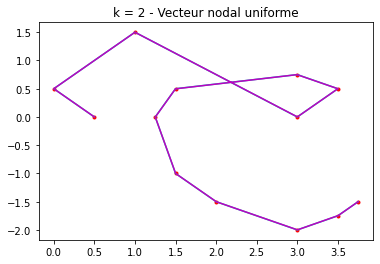

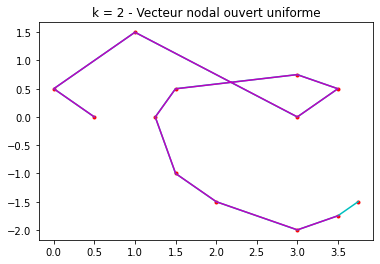

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


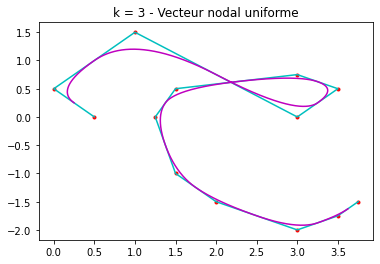

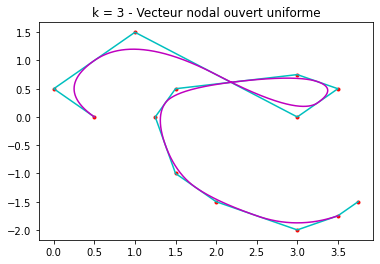

[0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


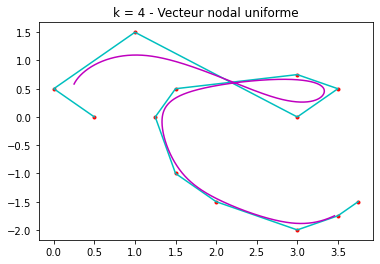

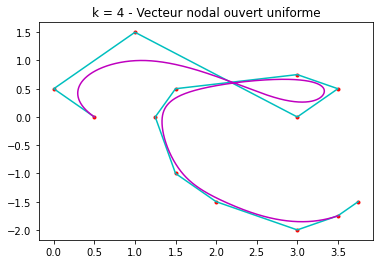

In [7]:
plt.figure()
pol2.plot()
plt.show()

for k in range(2, 5):
    nodal = [_ for _ in range(len(points2) + k - 1)]
    nodal2 = [0 for _ in range(k)] + [_ for _ in range(1, len(points2) - k)]
    nodal2 = nodal2 + [nodal2[len(nodal2) - 1] + 1 for _ in range(k)]
    print(nodal2)
    print(nodal)

    spine3 = BSpline(pol2, nodal, k)
    spine3_2 = BSpline(pol2, nodal2, k)


    plt.figure()
    pol2.plot()
    plt.title("k = " + str(k) + " - Vecteur nodal uniforme")
    spine3.plot(0.001)
    plt.show()

    plt.figure()
    pol2.plot()
    plt.title("k = " + str(k) + " - Vecteur nodal ouvert uniforme")
    spine3_2.plot(0.001)
    plt.show()

# Test sur un autre polygone


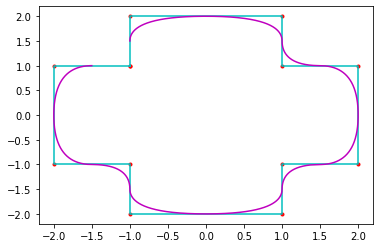

In [8]:
points3 = [
    Point(-1, 1),
    Point(-1, 2),
    Point(1, 2),
    Point(1, 1),
    Point(2, 1),
    Point(2, -1),
    Point(1, -1),
    Point(1, -2),
    Point(-1, -2),
    Point(-1, -1),
    Point(-2, -1),
    Point(-2, 1),
    Point(-1, 1),
]

k = 3
nodal = [_ for _ in range(len(points2) + k - 1)]
pol5 = Polygone(points3)
spline4 = BSpline(pol5, nodal, k)

plt.figure()
pol5.plot()
spline4.plot(0.001)
plt.show()

# Différences entre Bézier et B-Spline
On remarque qu'il est plus facile de suivre le polygone avec B-Spline. Pas besoin de s'embêter à faire du par morceau "à la main"

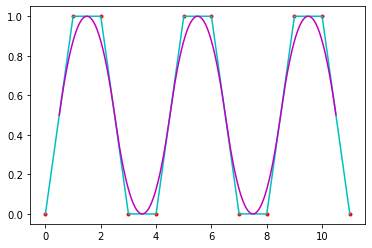

In [9]:
points4 = [
    Point(0, 0),
    Point(1, 1),
    Point(2, 1),
    Point(3, 0),
    Point(4, 0),
    Point(5, 1),
    Point(6, 1),
    Point(7, 0),
    Point(8, 0),
    Point(9, 1),
    Point(10, 1),
    Point(11, 0),
]

k = 3
nodal = [_ for _ in range(len(points4) + k - 1)]
pol6 = Polygone(points4)
spline5 = BSpline(pol6, nodal, k)

plt.figure()
pol6.plot()
spline5.plot(0.001)
plt.show()

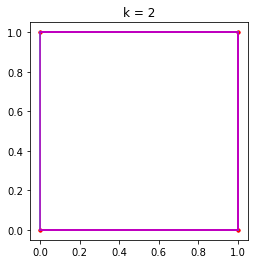

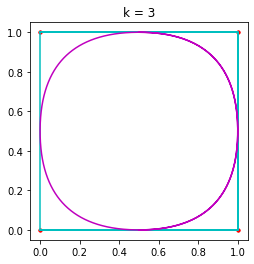

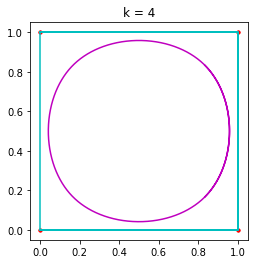

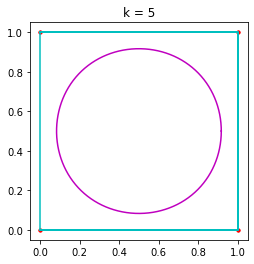

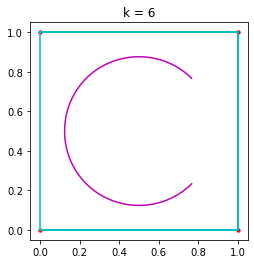

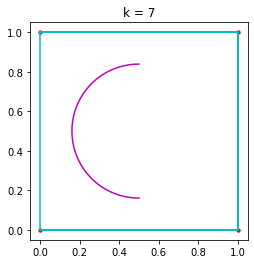

In [10]:
points5 = [
    Point(0, 1),
    Point(1, 1),
    Point(1, 0),
    Point(0, 0),
    Point(0, 1),
    Point(1, 1),
    Point(1, 0),
    Point(0, 0),
]

k = 3
nodal = [_ for _ in range(len(points5) + k - 1)]
pol7 = Polygone(points5)
spline6 = BSpline(pol7, nodal, k)


for k in range(2, 8):
    nodal = [_ for _ in range(len(points5) + k - 1)]

    spline6 = BSpline(pol7, nodal, k)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    pol7.plot()
    plt.title("k = " + str(k))
    spline6.plot(0.001)
    plt.show()